In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [2]:
print("Enter Inventory Capacity")
m = int(input())
print("Enter Cycle Length")
n = int(input())
total_days = 10*n

Enter Inventory Capacity
11
Enter Cycle Length
5


Cycle No:  1
Day:  1
3 ----- 3 ----- 0 ----- 0
Day:  2
0 ----- 0 ----- 0 ----- 0
Day:  3
8 ----- 2 ----- 6 ----- 0
Day:  4
6 ----- 3 ----- 3 ----- 0
Day:  5
3 ----- 2 ----- 1 ----- 0
Cycle No:  2
Day:  1
11 ----- 1 ----- 10 ----- 0
Day:  2
10 ----- 3 ----- 7 ----- 0
Day:  3
7 ----- 1 ----- 6 ----- 0
Day:  4
6 ----- 0 ----- 6 ----- 0
Day:  5
6 ----- 2 ----- 4 ----- 0
Cycle No:  3
Day:  1
4 ----- 0 ----- 4 ----- 0
Day:  2
4 ----- 2 ----- 2 ----- 0
Day:  3
9 ----- 3 ----- 6 ----- 0
Day:  4
6 ----- 2 ----- 4 ----- 0
Day:  5
4 ----- 3 ----- 1 ----- 0
Cycle No:  4
Day:  1
11 ----- 4 ----- 7 ----- 0
Day:  2
7 ----- 3 ----- 4 ----- 0
Day:  3
4 ----- 2 ----- 2 ----- 0
Day:  4
2 ----- 1 ----- 1 ----- 0
Day:  5
1 ----- 2 ----- 0 ----- 1
Cycle No:  5
Day:  1
0 ----- 2 ----- 0 ----- 3
Day:  2
12 ----- 2 ----- 7 ----- 0
Day:  3
7 ----- 2 ----- 5 ----- 0
Day:  4
5 ----- 2 ----- 3 ----- 0
Day:  5
3 ----- 2 ----- 1 ----- 0
Cycle No:  6
Day:  1
1 ----- 3 ----- 0 ----- 2
Day:  2
10 ----- 2 ----- 6 ----- 

<function matplotlib.pyplot.show>

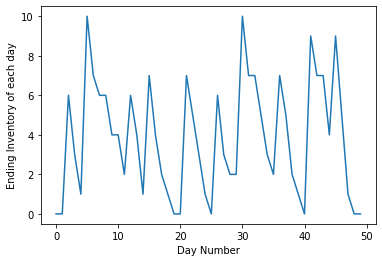

In [3]:
beginning_inventory = 3
demand = 0
ending_inventory = 0
ending_inventory_sum = 0
shortage_quantity = 0
short_days = 0
order_quantity = 8
days_until_next_arrival = 2


bar_list = []


for cycle in range(1, 11):
    print("Cycle No: ", cycle)
    for day in range(1, n+1):
        print("Day: ", day)

        # Calculate beginning inventory (beginning inventory + quantity arrived)
        # Write code here
        if days_until_next_arrival ==0:
          beginning_inventory += order_quantity
        # Today's demand
        daily_demand = np.random.choice([0,1,2,3,4], p=[0.10,0.25,0.35,0.21,0.09])
        total_demand = daily_demand + shortage_quantity

        if total_demand <= beginning_inventory:
            ending_inventory = beginning_inventory - total_demand
            shortage_quantity = 0
        else:
            extra_demand = total_demand - beginning_inventory
            shortage_quantity = extra_demand
            ending_inventory = 0
            # Count shortage days
            short_days +=1
        
        # print Beginning inventory, Daily demand, Ending inventory, Shortage quantity
        #print("Beginning inventory :",beginning_inventory)
        #print("Daily demand :",daily_demand)
        #print("Beginning inventory", "Daily demand", "Ending inventory", "Shortage quantity")
        print(beginning_inventory, "-----", daily_demand, "-----", ending_inventory, "-----", shortage_quantity)
        if(day==n):
            # Review day
            # Place order
            # Find order quantity
            res = (m - ending_inventory)
            order_quantity = shortage_quantity + res 
            # Generate random Lead time
            days_until_next_arrival = np.random.choice([1, 2, 3], p=[0.6, 0.3, 0.1])
            # days_until_next_arrival, order_quantity set
        
        beginning_inventory = ending_inventory
        ending_inventory_sum += ending_inventory
        bar_list.append(ending_inventory)
        days_until_next_arrival -= 1


# Avg ending inventory
avg_inventory = ending_inventory_sum / (total_days)
print("Average ending Units in inventory :", avg_inventory)
# Shortage day
print("Shotage occured :", short_days, "days")
# Ending inventory plot
plt.plot(bar_list)
plt.xlabel("Day Number")
plt.ylabel("Ending Inventory of each day")
plt.show